In [1]:
import numpy as np 
import pandas as pd 

import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# get the data
filname = 'fer2013.csv'
label_map = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
names=['emotion','pixels','usage']
df=pd.read_csv('fer2013.csv',names=names, na_filter=False)
im=df['pixels']
df.head(10)

,emotion,pixels,usage
0,emotion,pixels,Usage
1,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
2,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
3,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
4,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
5,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
6,2,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...,Training
7,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,Training
8,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,Training
9,3,85 84 90 121 101 102 133 153 153 169 177 189 1...,Training


In [3]:
def getData(filname):
    # images are 48x48
    # N = 35887
    Y = []
    X = []
    first = True
    for line in open(filname):
        if first:
            first = False
        else:
            row = line.split(',')
            Y.append(int(row[0]))
            X.append([int(p) for p in row[1].split()])

    X, Y = np.array(X) / 255.0, np.array(Y)
    return X, Y

In [4]:
X, Y = getData(filname)
num_class = len(set(Y))
print(num_class)

7


In [5]:
# keras with tensorflow backend
N, D = X.shape
X = X.reshape(N, 48, 48, 1)

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)
y_train = (np.arange(num_class) == y_train[:, None]).astype(np.float32)
y_test = (np.arange(num_class) == y_test[:, None]).astype(np.float32)

In [7]:
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
from tensorflow.keras.layers import BatchNormalization

In [10]:

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', padding="same", input_shape=((48, 48, 1))))
model.add(Conv2D(32, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(96, (3, 3), dilation_rate=(2, 2), activation='relu', padding="same"))
model.add(Conv2D(96, (3, 3), padding="valid", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), dilation_rate=(2, 2), activation='relu', padding="same"))
model.add(Conv2D(128, (3, 3), padding="valid", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(7 , activation='sigmoid'))

In [11]:
model.compile(loss='binary_crossentropy',optimizer='adam' ,metrics=['accuracy'])

In [22]:
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint
filepath="model.h5"
lr_reduce = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, epsilon=0.0001, patience=1, verbose=1)
check = ModelCheckpoint( filepath, save_best_only=True, mode='max')

In [23]:
history = model.fit(X_train, y_train, batch_size=128, callbacks=[lr_reduce, check], validation_data=(X_train,y_train), epochs = 50)

Epoch 1/50
253/253 [==============================] - 173s 683ms/step - loss: 0.3118 - accuracy: 0.4566 - val_loss: 0.2798 - val_accuracy: 0.5233 - lr: 0.0010
Epoch 2/50
253/253 [==============================] - 176s 696ms/step - loss: 0.2876 - accuracy: 0.5190 - val_loss: 0.2616 - val_accuracy: 0.5636 - lr: 0.0010
Epoch 3/50
253/253 [==============================] - 178s 703ms/step - loss: 0.2673 - accuracy: 0.5630 - val_loss: 0.2446 - val_accuracy: 0.6007 - lr: 0.0010
Epoch 4/50
253/253 [==============================] - 173s 683ms/step - loss: 0.2528 - accuracy: 0.5959 - val_loss: 0.2253 - val_accuracy: 0.6415 - lr: 0.0010
Epoch 5/50
253/253 [==============================] - 176s 698ms/step - loss: 0.2366 - accuracy: 0.6295 - val_loss: 0.2065 - val_accuracy: 0.6860 - lr: 0.0010
Epoch 6/50
253/253 [==============================] - 179s 708ms/step - loss: 0.2179 - accuracy: 0.6650 - val_loss: 0.1857 - val_accuracy: 0.7119 - lr: 0.0010
Epoch 7/50
253/253 [==========================

Epoch 39/50
253/253 [==============================] - ETA: 0s - loss: 0.0041 - accuracy: 0.9970
Epoch 39: ReduceLROnPlateau reducing learning rate to 1.0000000830368326e-17.
253/253 [==============================] - 194s 768ms/step - loss: 0.0041 - accuracy: 0.9970 - val_loss: 0.0022 - val_accuracy: 0.9976 - lr: 1.0000e-16
Epoch 40/50
253/253 [==============================] - ETA: 0s - loss: 0.0040 - accuracy: 0.9970
Epoch 40: ReduceLROnPlateau reducing learning rate to 1.0000000664932204e-18.
253/253 [==============================] - 193s 765ms/step - loss: 0.0040 - accuracy: 0.9970 - val_loss: 0.0022 - val_accuracy: 0.9976 - lr: 1.0000e-17
Epoch 41/50
253/253 [==============================] - ETA: 0s - loss: 0.0044 - accuracy: 0.9964
Epoch 41: ReduceLROnPlateau reducing learning rate to 1.000000045813705e-19.
253/253 [==============================] - 193s 762ms/step - loss: 0.0044 - accuracy: 0.9964 - val_loss: 0.0022 - val_accuracy: 0.9976 - lr: 1.0000e-18
Epoch 42/50
253/253 

In [24]:
new_model = tf.keras.models.load_model('model.h5')

In [25]:
objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
y_pos = np.arange(len(objects))
print(y_pos)

[0 1 2 3 4 5 6]


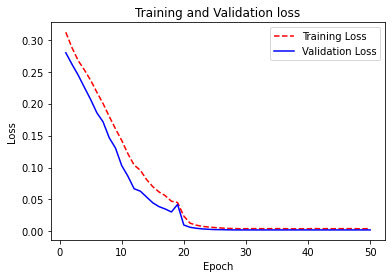

In [26]:
# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.title('Training and Validation loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

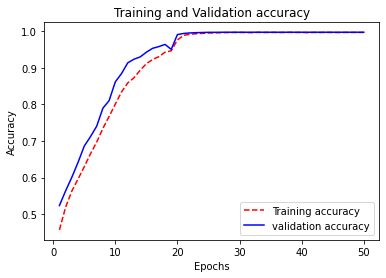

In [28]:
# Get training and test accuracy histories
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize accuracy history
plt.plot(epoch_count, loss_train, 'r--')
plt.plot(epoch_count, loss_val, 'b-')
plt.title('Training and Validation accuracy')
plt.legend(['Training accuracy','validation accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [29]:
def emotion_analysis(emotions):
    objects = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
    y_pos = np.arange(len(objects))
    plt.bar(y_pos, emotions, align='center', alpha=0.9)
    plt.tick_params(axis='x', which='both', pad=10,width=4,length=10)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    
plt.show()

In [30]:
y_pred=new_model.predict(X_test)
#print(y_pred)
y_test.shape

113/113 [==============================] - 5s 39ms/step


(3589, 7)

1/1 [==============================] - 0s 31ms/step


C:\Users\narayan.teli\Anaconda3\lib\site-packages\keras\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


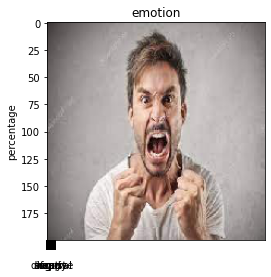

Expression Prediction: fear


In [31]:
from skimage import io
from tensorflow.keras.preprocessing import image
img = image.load_img('ang.jpg', grayscale=True, target_size=(48, 48))
show_img=image.load_img('ang.jpg', grayscale=False, target_size=(200, 200))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = new_model.predict(x)
#print(custom[0])
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(show_img)
plt.show()

m=0.000000000000000000001
a=custom[0]
for i in range(0,len(a)):
    if a[i]>m:
        m=a[i]
        ind=i
        
print('Expression Prediction:',objects[ind])